7


module

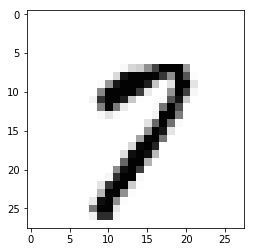

In [6]:
# Importing the required Keras modules containing model and layers
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras import backend as K
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D



img_rows, img_cols = 28, 28
#image_index = img

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

img = 9999
print(y_train[img]) 
plt.imshow(x_train[img], cmap='Greys')

x_train.shape
type(mnist)

In [7]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])








x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [8]:
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape)) #Convolved with the 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu)) #y = x1*w1 + b
model.add(Dense(10,activation=tf.nn.softmax))

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=2)

model.evaluate(x_test, y_test)

Epoch 1/2
53248/60000 [=========================>....] - ETA: 2s - loss: 0.1972 - acc: 0.9405

KeyboardInterrupt: 

In [ ]:

#Test prediction

img = 9999
plt.imshow(x_test[img].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[img].reshape(1, img_rows, img_cols, 1))
print(pred.argmax())